# Questão 2

In [119]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

## A)

In [120]:
df_a = pd.read_csv("resultados/resultado_questao_a.csv")

In [121]:
df_a = df_a[df_a["ValorMaximo"] == 940000]
df_a = df_a.sort_values(by=["TamanhoDaEntrada", "Algoritmo"])

resultados = []
for algoritmo in df_a["Algoritmo"].unique():
    dados_alg = df_a[df_a["Algoritmo"] == algoritmo]
    
    tempo_9M = dados_alg[dados_alg["TamanhoDaEntrada"] == 9400000]["TempoDeOrdenacao"].values
    tempo_94M = dados_alg[dados_alg["TamanhoDaEntrada"] == 94000000]["TempoDeOrdenacao"].values

    if len(tempo_9M) == 0 or len(tempo_94M) == 0:
        continue 
    
    crescimento = tempo_94M[0] / tempo_9M[0]

    intervalo_9M = (
        dados_alg[dados_alg["TamanhoDaEntrada"] == 9400000]["IntervaloInferior"].values[0],
        dados_alg[dados_alg["TamanhoDaEntrada"] == 9400000]["IntervaloSuperior"].values[0]
    )
    intervalo_94M = (
        dados_alg[dados_alg["TamanhoDaEntrada"] == 94000000]["IntervaloInferior"].values[0],
        dados_alg[dados_alg["TamanhoDaEntrada"] == 94000000]["IntervaloSuperior"].values[0]
    )

    resultados.append([algoritmo, tempo_9M[0], intervalo_9M, tempo_94M[0], intervalo_94M, crescimento])

df_a_resultados = pd.DataFrame(resultados, columns=[
    "Algoritmo", "Tempo_9M", "Intervalo_9M", "Tempo_94M", "Intervalo_94M", "Crescimento"
])

melhor_algoritmo = df_a_resultados.loc[df_a_resultados["Tempo_94M"].idxmin()]
pior_algoritmo = df_a_resultados.loc[df_a_resultados["Tempo_94M"].idxmax()]

print("\n🔹 Comparação do aumento de tempo:")
print(df_a_resultados)

print("\n✅ Melhor algoritmo para 94M de entradas:")
print(melhor_algoritmo)

print("\n❌ Pior algoritmo para 94M de entradas:")
print(pior_algoritmo)



🔹 Comparação do aumento de tempo:
  Algoritmo     Tempo_9M                              Intervalo_9M  \
0  counting   530.500000    (502.3947033981569, 558.6052966018431)   
1     merge  1458.000000  (1450.2115646238992, 1465.7884353761008)   
2     quick  1114.733333  (1101.5593486852592, 1127.9073179814077)   

      Tempo_94M                             Intervalo_94M  Crescimento  
0   6793.200000   (6554.2935666667145, 7032.106433333285)    12.805278  
1  14735.066667  (14673.720457328052, 14796.412876005284)    10.106356  
2  17435.533333   (17308.54733458482, 17562.519332081847)    15.640990  

✅ Melhor algoritmo para 94M de entradas:
Algoritmo                                       counting
Tempo_9M                                           530.5
Intervalo_9M      (502.3947033981569, 558.6052966018431)
Tempo_94M                                         6793.2
Intervalo_94M    (6554.2935666667145, 7032.106433333285)
Crescimento                                    12.805278
Name: 0,

Com a entrada de 9,4 milhões, é possível notar que counting sort é superior que os demais, possuindo melhor tempo e intervalo de confiança, enquanto merge sort é o pior em ambos aspectos. Entretanto, ao aumentar o valor de entrada para 94 milhões, vemos que counting sort se mantém com menor tempo e intervalo de confiança, mas, merge sort demonstra um desempenho melhor que o anterior, possuindo um tempo e intervalo melhor que o do quick sort, além disso, acaba também possuindo o menor crescimento em comparação com os demais.

O gráfico a seguir demonstra visualmente o que foi relatado:

### Gráfico 1

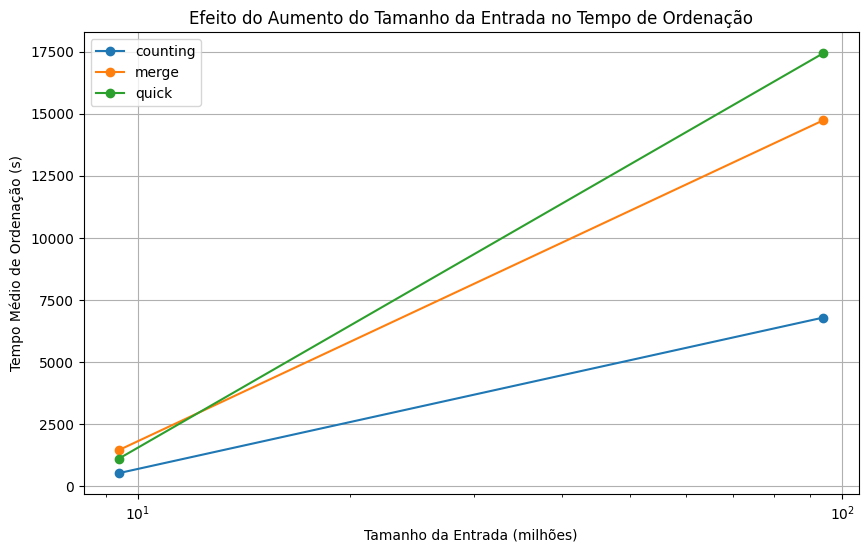

In [122]:
plt.figure(figsize=(10, 6))

for algoritmo in df_a_resultados["Algoritmo"].unique():
    subset = df_a_resultados[df_a_resultados["Algoritmo"] == algoritmo]
    plt.plot([9.4, 94], [subset["Tempo_9M"].values[0], subset["Tempo_94M"].values[0]], marker="o", label=algoritmo)

plt.xscale("log")
plt.xlabel("Tamanho da Entrada (milhões)")
plt.ylabel("Tempo Médio de Ordenação (s)")

plt.title("Efeito do Aumento do Tamanho da Entrada no Tempo de Ordenação")
plt.legend()
plt.grid(True)

nome_arquivo = os.path.join('graficos', 'grafico-1.jpg')
plt.savefig(nome_arquivo, format='jpg', dpi=300, bbox_inches='tight')

plt.show()

## B)

In [123]:
df = pd.read_csv("resultados/resultado_questao_b.csv")

# Filtrar apenas os dados com tamanho fixo de entrada (9,4 milhões)
df_filtered = df[df["TamanhoDaEntrada"] == 9400000]

# Analisar o aumento do tempo de ordenação
resultados = df_filtered.groupby(["Algoritmo", "ValorMaximo"]).agg(
    TempoMedio=("TempoDeOrdenacao", "mean"),
    IntervaloInferior=("IntervaloInferior", "mean"),
    IntervaloSuperior=("IntervaloSuperior", "mean"),
    ErroPadrao=("ErroPadrao", "mean")
).reset_index()

# Calcular a margem de erro (%)
resultados["MargemErro"] = (resultados["ErroPadrao"] / resultados["TempoMedio"]) * 100

# Verificar se atende ao critério de margem de erro <= 2%
resultados["AmostraSuficiente"] = resultados["MargemErro"] <= 2

# Identificar o melhor e o pior algoritmo em cada cenário
melhor_940k = resultados[resultados["ValorMaximo"] == 940000].nsmallest(1, "TempoMedio")
pior_940k = resultados[resultados["ValorMaximo"] == 940000].nlargest(1, "TempoMedio")
melhor_94M = resultados[resultados["ValorMaximo"] == 94000000].nsmallest(1, "TempoMedio")
pior_94M = resultados[resultados["ValorMaximo"] == 94000000].nlargest(1, "TempoMedio")

# Exibir resultados
print("🔹 Para Valor Máximo 940000:")
print(f"✅ Melhor Algoritmo: {melhor_940k.iloc[0]['Algoritmo']} (Tempo Médio: {melhor_940k.iloc[0]['TempoMedio']:.4f}s)")
print(f"❌ Pior Algoritmo: {pior_940k.iloc[0]['Algoritmo']} (Tempo Médio: {pior_940k.iloc[0]['TempoMedio']:.4f}s)")
print("-" * 50)
print("🔹 Para Valor Máximo 94000000:")
print(f"✅ Melhor Algoritmo: {melhor_94M.iloc[0]['Algoritmo']} (Tempo Médio: {melhor_94M.iloc[0]['TempoMedio']:.4f}s)")
print(f"❌ Pior Algoritmo: {pior_94M.iloc[0]['Algoritmo']} (Tempo Médio: {pior_94M.iloc[0]['TempoMedio']:.4f}s)")
print("-" * 50)

# Exibir verificação da margem de erro
print("📌 Verificação da margem de erro:")
print(resultados[["Algoritmo", "ValorMaximo", "TempoMedio", "MargemErro", "AmostraSuficiente"]])

🔹 Para Valor Máximo 940000:
✅ Melhor Algoritmo: counting (Tempo Médio: 473.6000s)
❌ Pior Algoritmo: merge (Tempo Médio: 1449.5333s)
--------------------------------------------------
🔹 Para Valor Máximo 94000000:
✅ Melhor Algoritmo: quick (Tempo Médio: 1104.6667s)
❌ Pior Algoritmo: counting (Tempo Médio: 1504.1333s)
--------------------------------------------------
📌 Verificação da margem de erro:
  Algoritmo  ValorMaximo   TempoMedio  MargemErro  AmostraSuficiente
0  counting       940000   473.600000    1.872044               True
1  counting     94000000  1504.133333    0.537717               True
2     merge       940000  1449.533333    0.936232               True
3     merge     94000000  1425.500000    0.692278               True
4     quick       940000  1155.733333    1.593669               True
5     quick     94000000  1104.666667    0.783469               True


Para quantidade de valores menores é observado que counting sort é o melhor algoritmo, enquanto merge sort acaba sendo o pior. Entretanto, quando se trata de valores maiores, o algoritmo de quick sort possuí um desempenho melhor, enquanto counting sort é o pior para esses cenário.

Abaixo temos uma representação visual para melhor entender:

### Gráfico 2

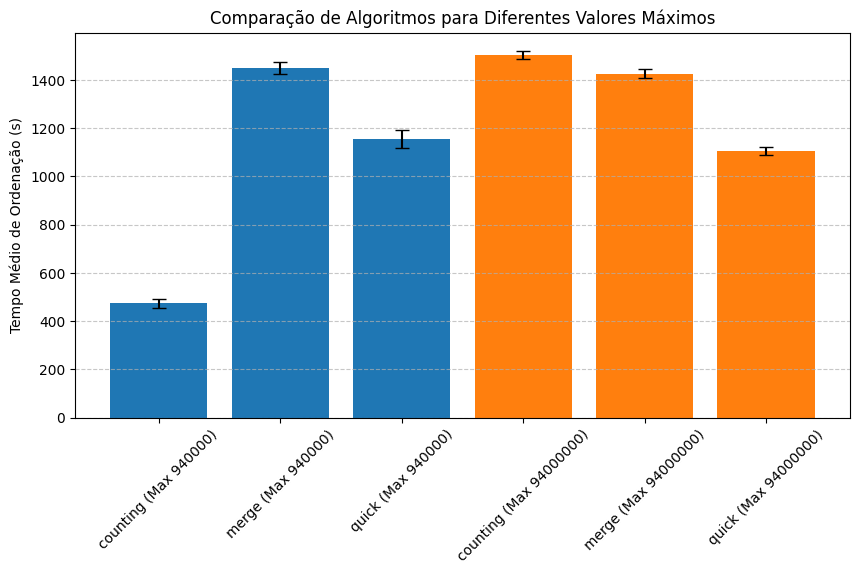

In [124]:
# Criar gráfico de comparação
plt.figure(figsize=(10, 5))
for max_val in resultados["ValorMaximo"].unique():
    df_plot = resultados[resultados["ValorMaximo"] == max_val]
    plt.bar(df_a_a_b_plot["Algoritmo"] + f" (Max {max_val})", df_plot["TempoMedio"], yerr=df_plot["TempoMedio"] - df_plot["IntervaloInferior"], capsize=5)

plt.ylabel("Tempo Médio de Ordenação (s)")
plt.title("Comparação de Algoritmos para Diferentes Valores Máximos")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

nome_arquivo = os.path.join('graficos', 'grafico-2.jpg')
plt.savefig(nome_arquivo, format='jpg', dpi=300, bbox_inches='tight')

plt.show()






É interessante observar que o algoritmo merge sort não teve muita diferença em seu tempo de ordenação, independente do valor de entrada, demonstrado uma maior estabilidade nesses aspecto que os demais.